# Introduction
The train set is not so big and their image colors are quite different. Normally we could think of color-augmentation but there is a run-time limit. Therefore according to me, we should normalize the colors even before doing any image augmentations.

# Data Downloading

In [1]:
from IPython.display import clear_output

root_dir = "/content"
!cd $root_dir
!gdown --id 1ks-qMyqh5rnrqmkbFQiMwk7BXTx32h6D
clear_output()

!tar -xvf training.tar.gz
clear_output()

!cd $root_dir

In [2]:
!mkdir -p $root_dir/input
!cd $root_dir
!mv training* $root_dir/input

mv: cannot move 'training' to '/content/input/training': Directory not empty


# Libraries

In [3]:
import os
import shutil
import tempfile
import matplotlib.pyplot as plt
import PIL
import torch
import numpy as np

%matplotlib inline

# Data Prepraration

In [4]:
import pandas as pd
import numpy as np

In [5]:
all_classes = ['scratch_small', 'scratch_large', 'dent_small', 'dent_large']
root_dir = "/content"

def get_frame(filename):
    df = pd.read_csv(filename)
    pos = [df[df[c] == 1].shape[0] for c in all_classes]
    pos += [df.shape[0]]

    image_dir = "/".join(filename.split("/")[:-1]) + "/images/"
    df["filepath"] = df["filename"].apply(lambda s: image_dir + s)

    print(filename, df.shape)
    print("count:", pos)
    return df, pos

df_train, pos_train = get_frame(f"{root_dir}/input/training/labels.csv")
df_train.head()

/content/input/training/labels.csv (5000, 6)
count: [1273, 855, 1226, 589, 5000]


filename  ...                                       filepath
0  002YxUqF3Q.png  ...  /content/input/training/images/002YxUqF3Q.png
1  00Fo8XYcvC.png  ...  /content/input/training/images/00Fo8XYcvC.png
2  02s1G8Wwg8.png  ...  /content/input/training/images/02s1G8Wwg8.png
3  035EI0mrFh.png  ...  /content/input/training/images/035EI0mrFh.png
4  0385gp8ksf.png  ...  /content/input/training/images/0385gp8ksf.png

[5 rows x 6 columns]

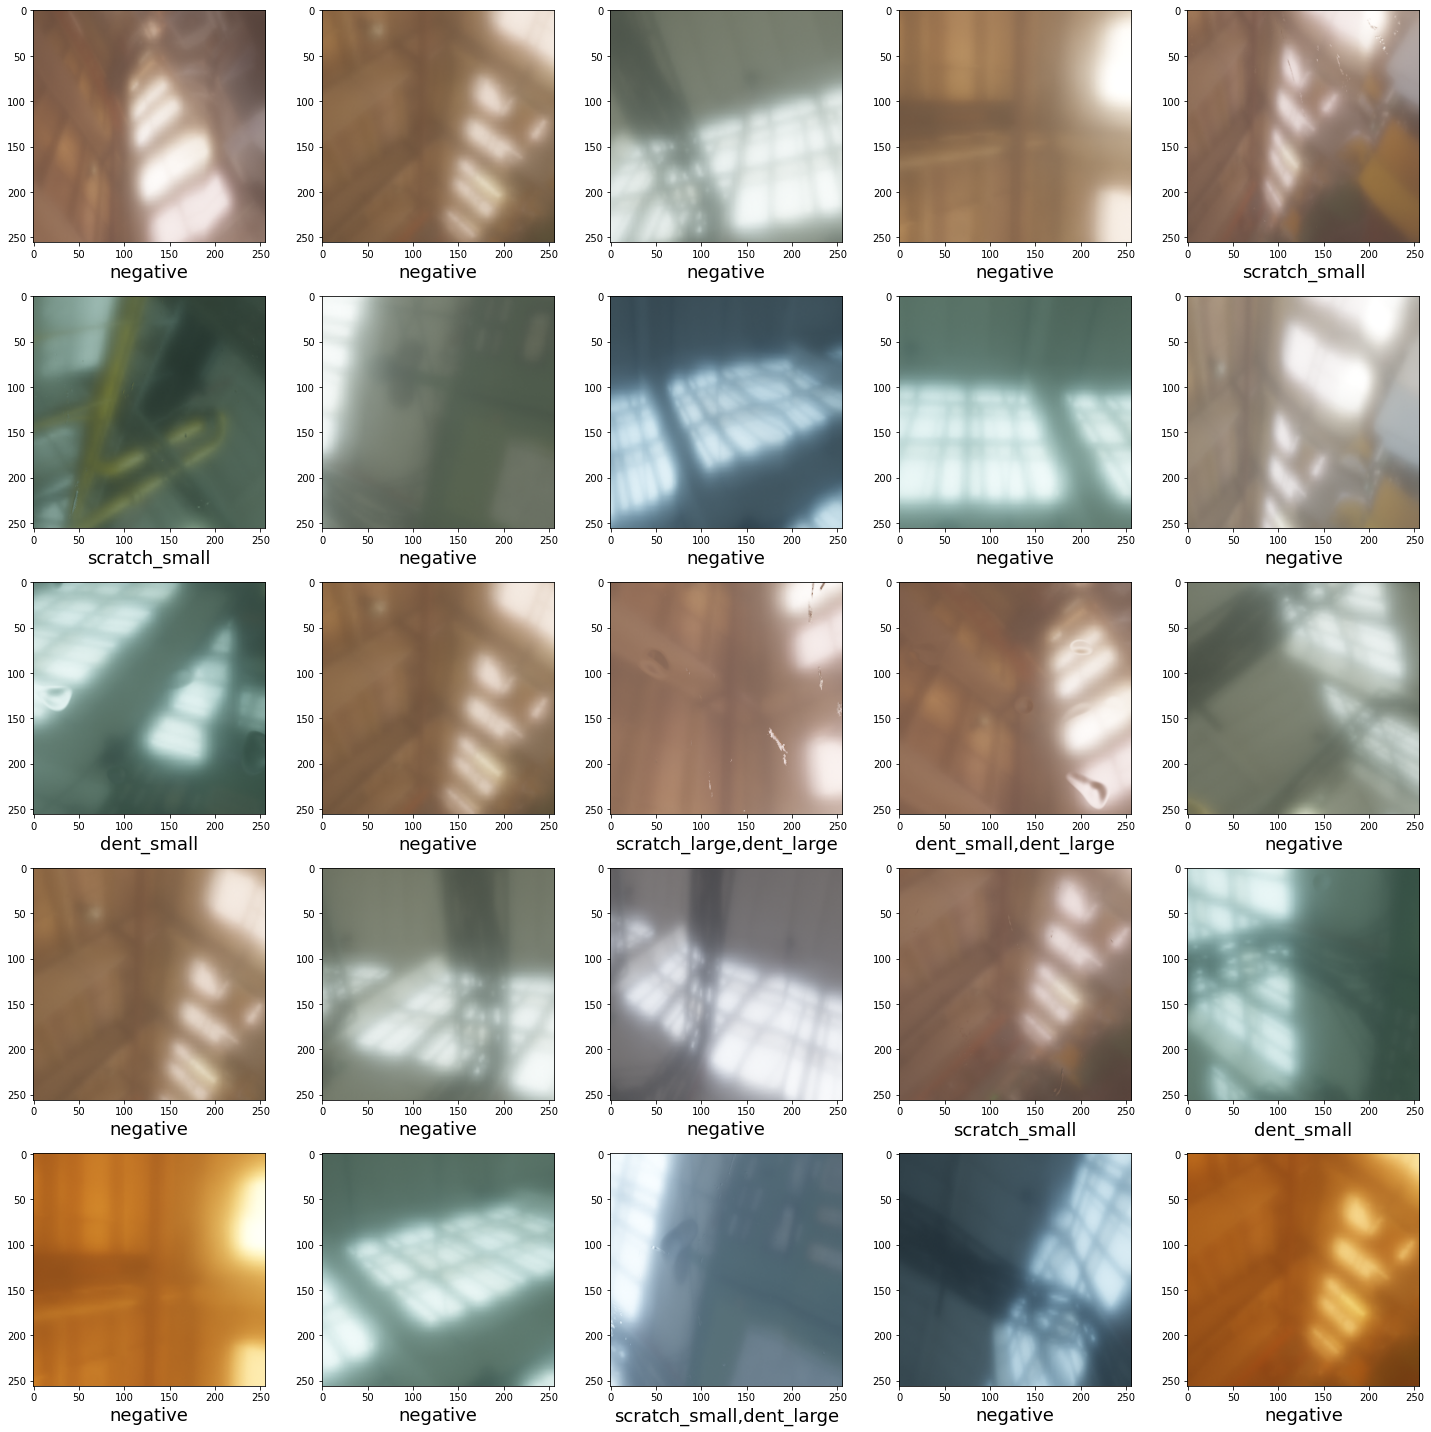

In [6]:
plt.subplots(5, 5, figsize=(20, 20))

train_dir = f"{root_dir}/input/training/images"

def get_text_lables(row):
    label = [c for c in all_classes if row[c] > 0]
    if len(label) > 0:
        return ",".join(label)
    else:
        return "negative"

for i, row in df_train.head(25).reset_index(drop=True).iterrows():
    filename = row["filename"]
    im = PIL.Image.open(f"{train_dir}/{filename}")
    arr = np.array(im)
    plt.subplot(5, 5, i + 1)
    plt.xlabel(get_text_lables(row), fontsize=18)
    plt.imshow(arr, cmap="gray", vmin=0, vmax=255)
plt.tight_layout()
plt.show()

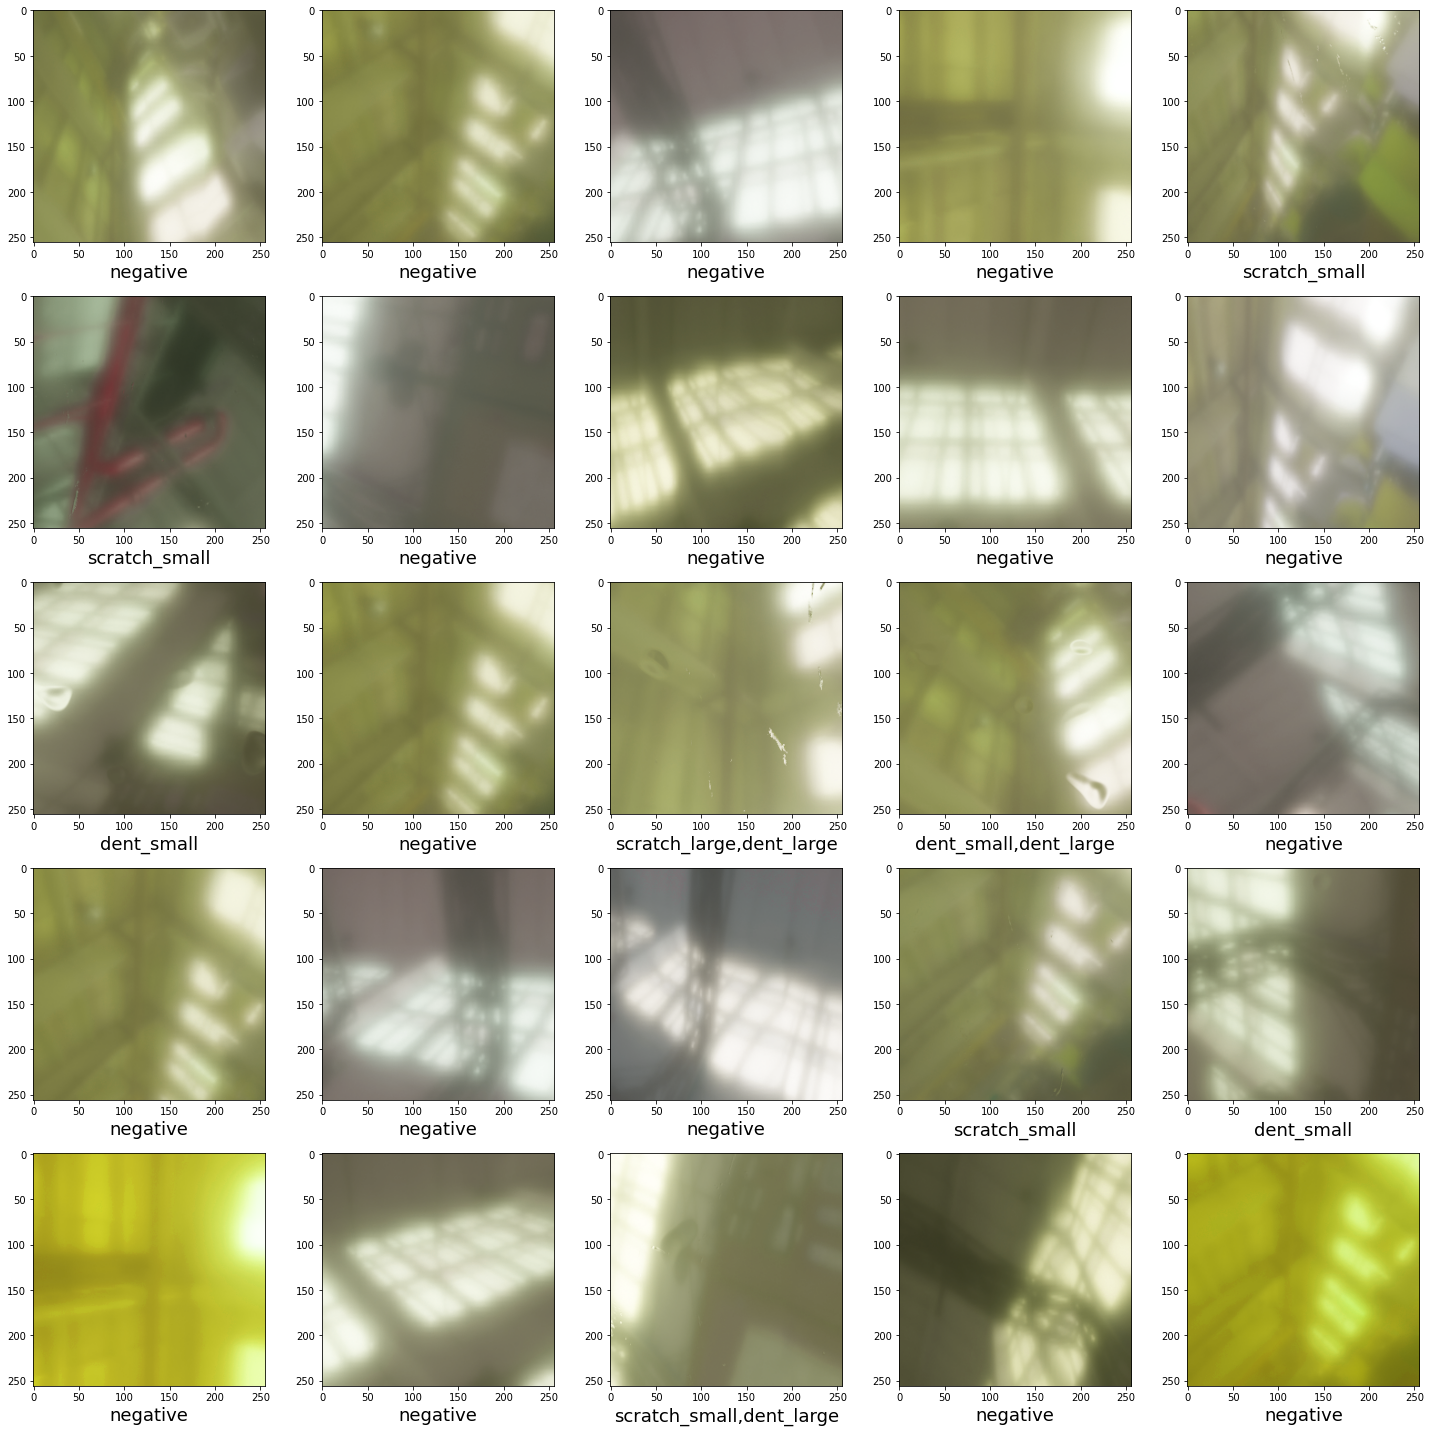

In [7]:
plt.subplots(5, 5, figsize=(20, 20))

import cv2
from skimage import io

for i, row in df_train.head(25).reset_index(drop=True).iterrows():
    filename = row["filename"]
    
    im = io.imread(f"{train_dir}/{filename}")
    img_hsv = cv2.cvtColor(im, cv2.COLOR_RGB2HSV)

    hue = img_hsv[:,:,0]
    m = int(hue.mean())
    hue = hue - m + 30
    cond = hue[:, :] > 360
    hue[cond] = hue[cond] - 360
    img_hsv[:,:,0] = hue
    
    arr = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB)

    plt.subplot(5, 5, i + 1)
    plt.xlabel(get_text_lables(row), fontsize=18)
    plt.imshow(arr, cmap="gray", vmin=0, vmax=255)
    
plt.tight_layout()
plt.show()